In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment

In [2]:
data = pd.read_excel("G:\study\Data Science - ICT\Week11\iris.xls")

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# 2. Do necessary pre-processing steps.

In [6]:
#check for missing values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

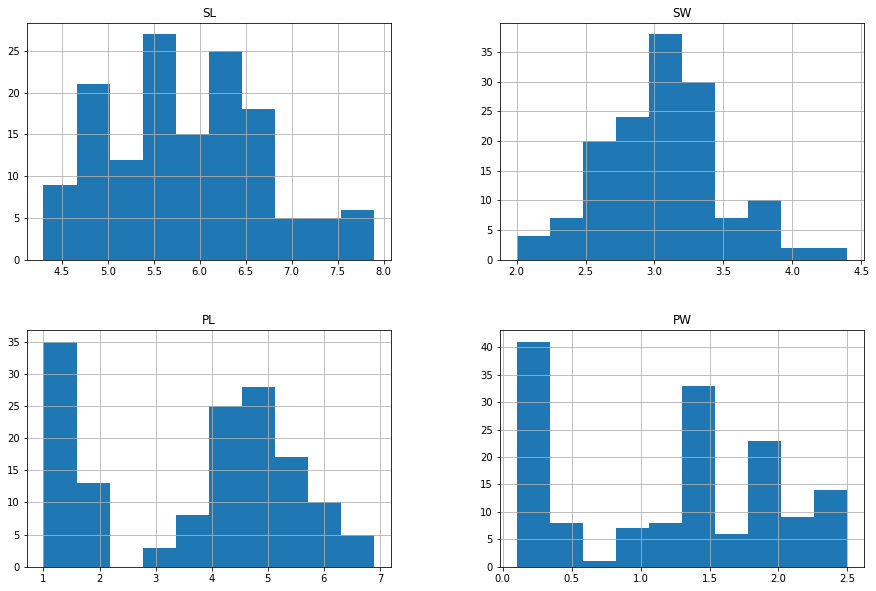

In [8]:
freqgraph=data
freqgraph.hist(figsize=(15,10))
plt.show()

In [9]:
#fiiling missing values
data['SL'] = data['SL'].fillna(data.groupby('Classification')['SL'].transform('mean'))
data['SW'] = data['SW'].fillna(data.groupby('Classification')['SW'].transform('mean'))
data['PL'] = data['PL'].fillna(data.groupby('Classification')['PL'].transform('median'))

In [10]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,Iris-setosa
1,4.900000,3.0,1.40,0.2,Iris-setosa
2,5.008511,3.2,1.30,0.2,Iris-setosa
3,4.600000,3.1,1.50,0.2,Iris-setosa
4,5.000000,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,Iris-virginica
146,6.300000,2.5,5.00,1.9,Iris-virginica
147,6.500000,3.0,5.55,2.0,Iris-virginica
148,6.200000,3.4,5.40,2.3,Iris-virginica


In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Box plot of SW')

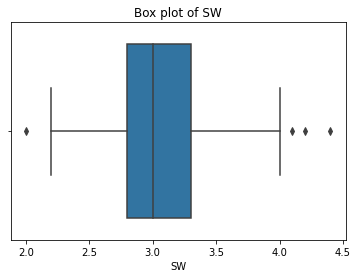

In [12]:
#check for outliers
sns.boxplot(x='SW',data=data)
plt.title('Box plot of SW')

In [14]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values less than',low_lim,'and the values greater than',up_lim,'are outliers.')

The Q1 value: 2.8
The Q2 value: 3.0
The Q3 value: 3.3
The values less than 2.05 and the values greater than 4.05 are outliers.


In [16]:
outlier=[]
for x in data["SW"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in SW feature')
print('Outliers are:',outlier)

There are 4 outliers in SW feature
Outliers are: [4.4, 4.1, 4.2, 2.0]


In [20]:
ind1,ind2=data['SW'] > up_lim,data['SW'] < low_lim
i1=data.loc[ind1].index
i2=data.loc[ind2].index
print('Ootlier indexes are', i1, i2)

Ootlier indexes are Int64Index([15, 32, 33], dtype='int64') Int64Index([60], dtype='int64')


In [22]:
data.drop([15, 32, 33,60],inplace=True)

C:\Users\munee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


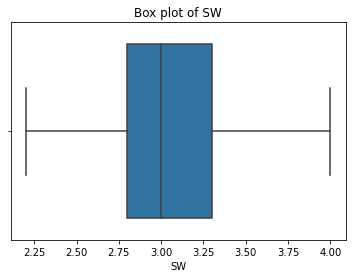

In [24]:
sns.boxplot(data['SW'])
plt.title('Box plot of SW')
plt.show()

In [25]:
#out liers are removed

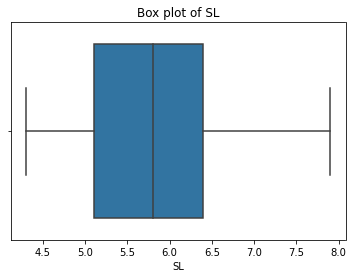

In [27]:
#check outliers in SL
sns.boxplot(x='SL',data=data)
plt.title('Box plot of SL')
plt.show()

In [28]:
#NO Outliers present

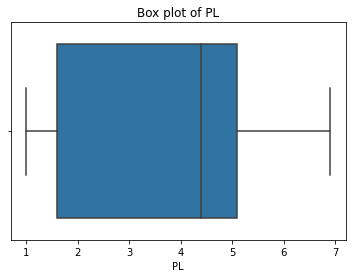

In [29]:
#Check outliers in PL
sns.boxplot(x='PL',data=data)
plt.title('Box plot of PL')
plt.show()

In [30]:
#No Outliers present in PL

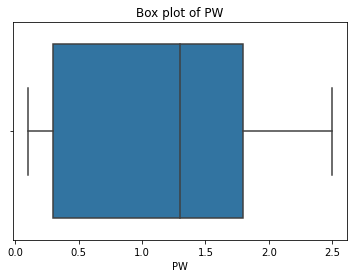

In [31]:
sns.boxplot(x='PW',data=data)
plt.title('Box plot of PW')
plt.show()

In [32]:
#No Outliers present in PW

In [33]:
#Label Encoding

In [38]:
x=data.drop(['Classification'],axis=1) #Splitting the data set into target and features
y=pd.DataFrame(data['Classification'])
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data['Classification'] = label_en.fit_transform(data['Classification'])

In [39]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,0
1,4.900000,3.0,1.40,0.2,0
2,5.008511,3.2,1.30,0.2,0
3,4.600000,3.1,1.50,0.2,0
4,5.000000,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,2
146,6.300000,2.5,5.00,1.9,2
147,6.500000,3.0,5.55,2.0,2
148,6.200000,3.4,5.40,2.3,2


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [40]:
from sklearn.model_selection import train_test_split
#Splitting the data set into target and features
x=data.drop(['Classification'],axis=1) 
y=pd.DataFrame(data['Classification'])


# Spliting the dataset for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

## 1. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',C=10.0,random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score,recall_score

log_ac=accuracy_score(y_test,y_pred)
log_f1=f1_score(y_test,y_pred,average='weighted')

C:\Users\munee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.972972972972973
Precision score is: 0.9749034749034748
Recall score is: 0.972972972972973
f1 score is: 0.9725725725725727


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[16  0  0]
 [ 0  7  1]
 [ 0  0 13]]


## 2.KNN Model

In [46]:

from sklearn.neighbors import KNeighborsClassifier as knn



acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)
    

C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

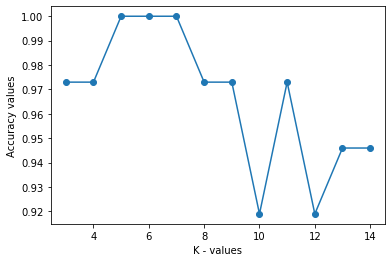

In [47]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show()

In [52]:
classifier = knn(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)   
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))


print('Confusion Matrix is')
confusion_matrix(y_test,y_pred)

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0
Confusion Matrix is


C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 13]], dtype=int64)

## 3. Support Vector Machine(SVM)

In [53]:
# SVM Linear kernel
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

C:\Users\munee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

print('Confusion Matrix is: ')
confusion_matrix(y_test,y_pred)

Accuracy is:  0.972972972972973
Precision is:  0.972972972972973
Recall is:  0.972972972972973
F1 score is:  0.972972972972973
Confusion Matrix is: 


array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

In [55]:
#2. SVM polynomial kernel
from sklearn.svm import SVC

svm_poly=SVC(kernel='poly')

svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

C:\Users\munee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'weighted'))

print('Confusion Matrix is: ')
confusion_matrix(y_test,y_pred)

Accuracy is:  0.972972972972973
Precision is:  0.9749034749034748
Recall is:  0.972972972972973
F1 score is:  0.9725725725725727
Confusion Matrix is: 


array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]], dtype=int64)

In [57]:
#3. Radial Basis Function SVM
from sklearn.svm import SVC

svm_radial=SVC(kernel='rbf')

svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)


C:\Users\munee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'weighted'))

print('Confusion Matrix is: ')
confusion_matrix(y_test,y_pred)

Accuracy is:  0.918918918918919
Precision is:  0.9410319410319411
Recall is:  0.918918918918919
F1 score is:  0.9200321603067599
Confusion Matrix is: 


array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  3, 10]], dtype=int64)

## 3.Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

print('Confusion Matrix is: ')
confusion_matrix(y_test,y_pred)

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 score is:  0.9459459459459459
Confusion Matrix is: 


array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

## 5. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

<ipython-input-60-703845e632b7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [61]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'weighted'))

print('Confusion Matrix is: ')
confusion_matrix(y_test,y_pred)

Accuracy is:  0.9459459459459459
Precision is:  0.9459459459459459
Recall is:  0.9459459459459459
F1 score is:  0.9459459459459459
Confusion Matrix is: 


array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]], dtype=int64)

### From the above Results we can infer that KNN is best model comparing to others as it has highest F1-score,Accuracy and Precision(F1-score,Accuracy,Precision = 1).